In [1]:
pwd

'/home/me/phd/actual-causality/subprojects/metamorphic'

In [2]:
import sys
sys.path.append('/home/me/phd/actual-causality/subprojects/metamorphic/case-studies/lift')

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import heapq
from collections import deque, defaultdict

from search_formulation import MonotoQual, RevMonotoQual, SearchSpace, hp_cause_bfs, hp_cause_mm
from lift_simulation import LiftSimulation, run_lift_simulation_for_lifts

In [17]:
# using actual simulator
# simulator_func = run_lift_simulation_for_lifts

# using a mock simulator
class MockLiftsSimulator:
    def __init__(self, max_time):
        self.max_time = max_time

    def simulate(self, num_lifts):
        time.sleep(self.max_time / num_lifts)
        return self.max_time / num_lifts

mock_simulator = MockLiftsSimulator(max_time=1)
simulator_func = mock_simulator.simulate

search_space = SearchSpace(simulator_func)

In [12]:
def run_exp(N):
    V = list(range(N))
    v = np.random.randint(0, 2, size=N)
    awt = simulator_func(sum(v))
    awt_thr = awt * 0.9
    print(f"Initially active lifts: {np.sum(v)}/{N}, initial AWT: {awt}, aiming for: {awt_thr}")

    tic = time.time()
    X = hp_cause_bfs(V, v, awt_thr, search_space)
    toc = time.time()
    d_hp = toc - tic
    print('hp done')

    mms = [MonotoQual(i) for i in V]

    tic = time.time()
    hp_cause_mm(V, v, awt_thr, mms, search_space)
    toc = time.time()
    d_hp_mm = toc - tic
    print('hp mm done')

    return {'d_hp': d_hp, 'd_hp_mm': d_hp_mm}

In [28]:
def draw_hists(results):
    d_hp_list = [res['d_hp'] for res in results]
    d_hp_mm_list = [res['d_hp_mm'] for res in results]

    fig, ax = plt.subplots(1, 2, figsize=(11, 5))
    ax[0].hist([d_hp_list, d_hp_mm_list], bins=20, alpha=0.5, label=['d_hp', 'd_hp_mm'], density=True)
    ax[0].legend()
    ax[0].set_xlabel('Time (seconds)')
    ax[0].set_ylabel('Frequency')
    ax[0].set_title('Histogram of d_hp and d_hp_mm')
    
    color1 = 'tab:blue'
    color2 = 'tab:orange'

    # Plot KDE for d_hp_list on ax1 (left y-axis), restrict to non-negative values
    sns.kdeplot(d_hp_list, ax=ax[1], color=color1, label='d_hp', fill=True, alpha=0.5, clip=(0, None))
    ax[1].set_xlabel('Time (seconds)')
    ax[1].set_ylabel('Density (d_hp)', color=color1)
    ax[1].tick_params(axis='y', labelcolor=color1)

    # Create a second y-axis for d_hp_mm_list, restrict to non-negative values
    ax2 = ax[1].twinx()
    sns.kdeplot(d_hp_mm_list, ax=ax2, color=color2, label='d_hp_mm', fill=True, alpha=0.5, clip=(0, None))
    ax2.set_ylabel('Density (d_hp_mm)', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    ax[1].set_title('KDE of d_hp and d_hp_mm (with twin axes)')
    
    fig.tight_layout()
    plt.show()


In [19]:
max_num_lifts= 20
num_experiments = 1
results = [run_exp(max_num_lifts) for _ in tqdm(range(num_experiments))]

  0%|          | 0/1 [00:00<?, ?it/s]

Initially active lifts: 14/20, initial AWT: 0.07142857142857142, aiming for: 0.06428571428571428
hp done


100%|██████████| 1/1 [00:16<00:00, 16.51s/it]

hp mm done


/tmp/ipykernel_301091/3368720166.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(d_hp_list, ax=ax[1], color=color1, label='d_hp', fill=True, alpha=0.5, clip=(0, None))
/tmp/ipykernel_301091/3368720166.py:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(d_hp_mm_list, ax=ax2, color=color2, label='d_hp_mm', fill=True, alpha=0.5, clip=(0, None))


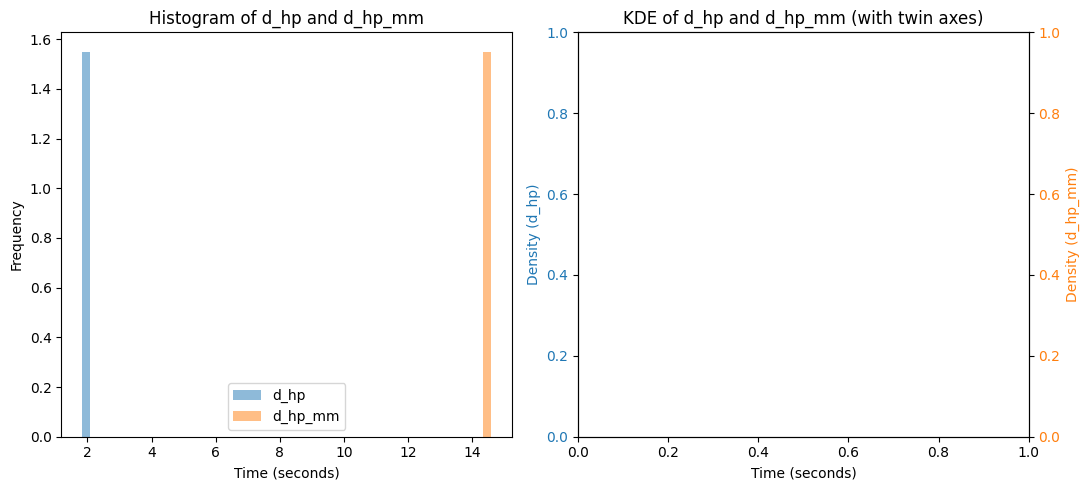

In [29]:
draw_hists(results)

In [ ]:
max_num_lifts= 30
num_experiments = 10
results = [run_exp(max_num_lifts) for _ in tqdm(range(num_experiments))]
draw_hists(results)

  0%|          | 0/10 [00:00<?, ?it/s]

Initially active lifts: 16/30, initial AWT: 51.22428987203231, aiming for: 46.10186088482908


  0%|          | 0/10 [05:25<?, ?it/s]


KeyboardInterrupt: 